# Clustering based on the songs features:

This jupyter notebook shows the process of clustering based on the song's features for the project's visualization and analysis. For clustering the dataset, it was used the algorithm K-Means Clustering Algorithm.

This code was written by [Sylvester Cardorelle](https://github.com/SylCard/Spotify-Emotions-Project). However, I edited it according to this project. 

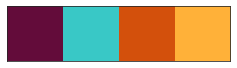

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Preparing the dataset

In [3]:
# Import my final dataset in csv file
songs = pd.read_csv("Thesis Dataset Final csv.csv")

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5964 entries, 0 to 5963
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5964 non-null   object 
 1   embed_link        5964 non-null   object 
 2   title             5964 non-null   object 
 3   uri               5964 non-null   object 
 4   all_artists       5964 non-null   object 
 5   artists_id        5964 non-null   object 
 6   artists_uri       5964 non-null   object 
 7   genres            5964 non-null   object 
 8   popularity        5964 non-null   int64  
 9   release_date      5964 non-null   object 
 10  danceability      5964 non-null   float64
 11  energy            5964 non-null   float64
 12  key               5964 non-null   int64  
 13  loudness          5964 non-null   float64
 14  mode              5964 non-null   int64  
 15  acousticness      5964 non-null   float64
 16  instrumentalness  5964 non-null   float64


In [4]:
#In this step I dropped the duration_ms , time_signature, key, mode and popularity data. I did not considered them into the clustering. The reasons of this are in the main document.

songs = songs.drop(['duration_ms','time_signature','popularity', 'key', 'mode'],axis=1)
songs.head()

,id,embed_link,title,uri,all_artists,artists_id,artists_uri,genres,release_date,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,speechiness,tempo
0,7L3CKqmwOlGY46XsPhGYrF,https://embed.spotify.com?uri=spotify%3Atrack%...,"Cloud Atlas - Sextet (From ""Cloud Atlas"") - Pi...",spotify:track:7L3CKqmwOlGY46XsPhGYrF,Jonas Kvarnström,4qZrlSJ1sikAjQS9rrBBpx,spotify:artist:4qZrlSJ1sikAjQS9rrBBpx,film score,07/05/2015,0.198,0.0668,-18.354,0.97500,0.895000,0.0593,0.0865,0.0355,75.020
1,7L3CKqmwOlGY46XsPhGYrF,https://embed.spotify.com?uri=spotify%3Atrack%...,"Cloud Atlas - Sextet (From ""Cloud Atlas"") - Pi...",spotify:track:7L3CKqmwOlGY46XsPhGYrF,Jonas Kvarnström,4qZrlSJ1sikAjQS9rrBBpx,spotify:artist:4qZrlSJ1sikAjQS9rrBBpx,film score,07/05/2015,0.198,0.0668,-18.354,0.97500,0.895000,0.0593,0.0865,0.0355,75.020
2,0kEZlJh4mK1QRfb3CT5LPk,https://embed.spotify.com?uri=spotify%3Atrack%...,Kill Yourself (Part III),spotify:track:0kEZlJh4mK1QRfb3CT5LPk,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,spotify:artist:1VPmR4DJC1PlOtd0IADAO0,emo,21/09/2015,0.753,0.6800,-7.092,0.32600,0.000041,0.4230,0.1920,0.0349,105.977
3,6QFQqqYye5lAcnhCALvxKJ,https://embed.spotify.com?uri=spotify%3Atrack%...,My Flaws Burn Through My Skin Like Demonic Fla...,spotify:track:6QFQqqYye5lAcnhCALvxKJ,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,spotify:artist:1VPmR4DJC1PlOtd0IADAO0,emo,01/08/2015,0.780,0.7480,-7.394,0.00448,0.000546,0.1150,0.0663,0.0352,125.980
4,3Pe5Pcw5BTwI6NWe00QdVy,https://embed.spotify.com?uri=spotify%3Atrack%...,Para Mi Amor,spotify:track:3Pe5Pcw5BTwI6NWe00QdVy,10stack,2cFUpST5z9ZKyYTwg90eq5,spotify:artist:2cFUpST5z9ZKyYTwg90eq5,hip-hop,31/10/2018,0.633,0.3770,-14.975,0.76100,0.804000,0.2870,0.3880,0.0842,119.822


In [5]:
# grabbing the songs features
songs.describe()

,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,speechiness,tempo
count,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000
mean,0.448941,0.312507,-14.933652,0.693735,0.395614,0.147986,0.286948,0.049318,111.488053
std,0.177533,0.236908,7.728243,0.339493,0.415718,0.109708,0.219711,0.042125,32.046005
min,0.000000,0.000231,-45.393000,0.000006,0.000000,0.021900,0.000000,0.000000,0.000000
25%,0.313750,0.113000,-19.718000,0.441000,0.000132,0.094300,0.110000,0.033500,85.016000
50%,0.451000,0.268000,-13.182000,0.863000,0.142000,0.110000,0.228000,0.038900,110.065000
75%,0.576000,0.479000,-8.767000,0.972000,0.887000,0.147000,0.410000,0.048200,132.811750
max,0.957000,0.986000,-1.641000,0.996000,0.983000,0.962000,0.975000,0.945000,216.069000


Normalising the Loudness, Tempo and Key:

> "Before feeding the data to any ML algorithms, I had to make sure that the features were correctly scaled. Typically ML algorithms do not perform well when numerical attributes are operating at very different scales, as it introduces bias to their objective functions" - [Sylvester Cardorelle](https://github.com/SylCard/Spotify-Emotions-Project)

- Loudness feature is from -60db to 0
- Tempo feature is in BPM

In this sense, I normalised this features between 0 and 1 because most of the features provided from Spotify API are measured between 1 and 0.


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>]], dtype=object)

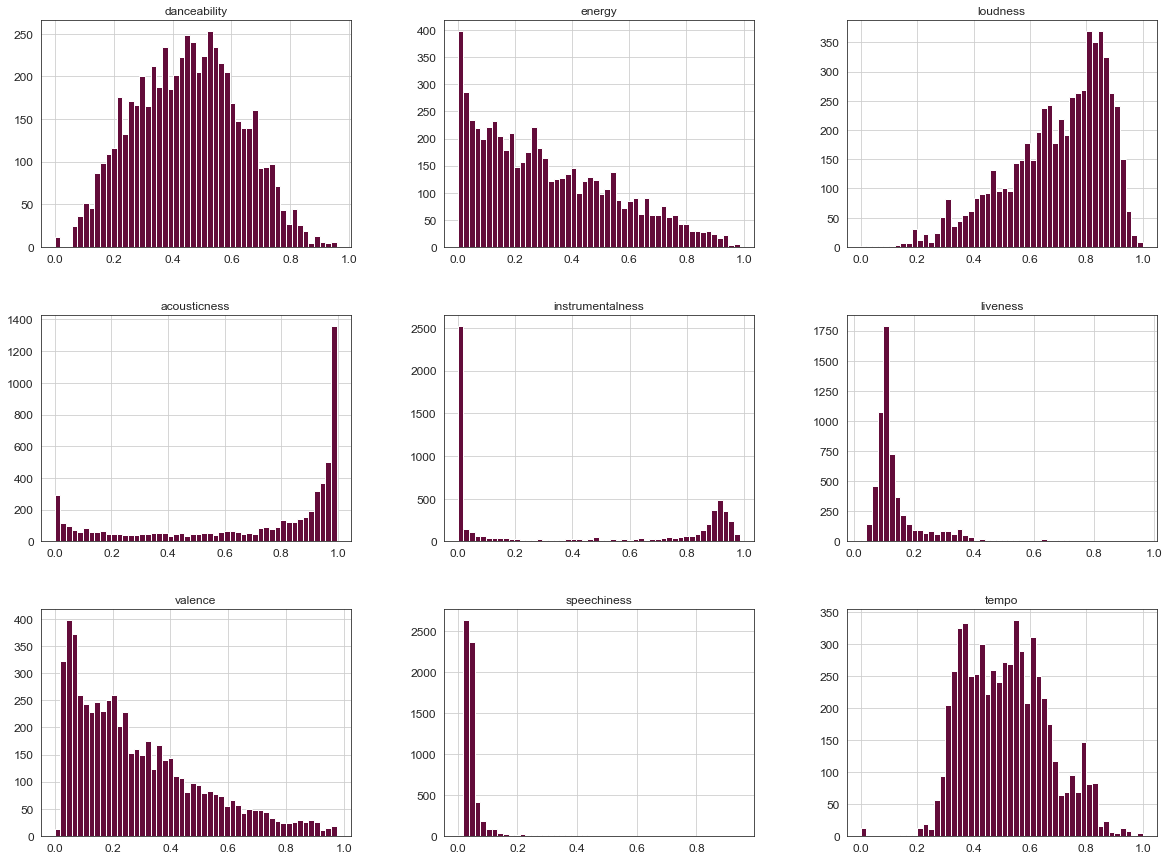

In [6]:
from sklearn import preprocessing

from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

tempo = songs[['tempo']].values
min_max_scaler = preprocessing.MinMaxScaler()
tempo_scaled = min_max_scaler.fit_transform(tempo)
songs['tempo'] = pd.DataFrame(tempo_scaled)


songs.hist(bins=50,figsize=(20,15))

array([[<AxesSubplot:xlabel='danceability', ylabel='danceability'>,
        <AxesSubplot:xlabel='energy', ylabel='danceability'>,
        <AxesSubplot:xlabel='loudness', ylabel='danceability'>,
        <AxesSubplot:xlabel='speechiness', ylabel='danceability'>,
        <AxesSubplot:xlabel='acousticness', ylabel='danceability'>,
        <AxesSubplot:xlabel='tempo', ylabel='danceability'>,
        <AxesSubplot:xlabel='liveness', ylabel='danceability'>,
        <AxesSubplot:xlabel='valence', ylabel='danceability'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='danceability'>],
       [<AxesSubplot:xlabel='danceability', ylabel='energy'>,
        <AxesSubplot:xlabel='energy', ylabel='energy'>,
        <AxesSubplot:xlabel='loudness', ylabel='energy'>,
        <AxesSubplot:xlabel='speechiness', ylabel='energy'>,
        <AxesSubplot:xlabel='acousticness', ylabel='energy'>,
        <AxesSubplot:xlabel='tempo', ylabel='energy'>,
        <AxesSubplot:xlabel='liveness', ylabel='energy'>

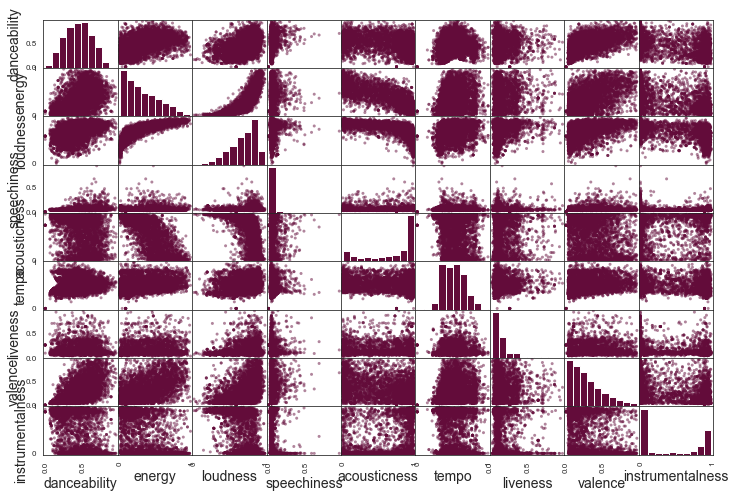

In [7]:
from pandas.plotting import scatter_matrix
# attributes should contain the features we want to compare
attr = ['danceability','energy','loudness','speechiness','acousticness','tempo','liveness','valence','instrumentalness']
scatter_matrix(songs[attr],figsize=(12,8))

In [9]:
# removing song names, artist, id, uris, embed link, genres and release date columns before clustering
songs_features = songs.copy()
songs_features = songs_features.drop(['id','title', 'embed_link', 'uri', 'all_artists', 'artists_id', 'artists_uri', 'genres',  'release_date'],axis=1)

## Clustering the songs

> "K-Means Clustering Algorithm is great at finding underlying distributions in data. It is an unsupervised learning algorithm which has one aim: Group similar data points into k groups and discover underlying patterns. To achieve that aim it looks for a predefined number (k) of clusters." - [Sylvester Cardorelle](https://github.com/SylCard/Spotify-Emotions-Project)

In [10]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [11]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4317272874328021)
For n_clusters = 3, silhouette score is 0.3973620852779619)
For n_clusters = 4, silhouette score is 0.39783581809609336)
For n_clusters = 5, silhouette score is 0.32557412560225146)
For n_clusters = 6, silhouette score is 0.2374347291133442)
For n_clusters = 7, silhouette score is 0.2274906642499564)
For n_clusters = 8, silhouette score is 0.2093629488051889)
For n_clusters = 9, silhouette score is 0.18615307237633782)
For n_clusters = 10, silhouette score is 0.1973874480497457)
For n_clusters = 11, silhouette score is 0.19112310493814574)
For n_clusters = 12, silhouette score is 0.18305416675696054)
For n_clusters = 13, silhouette score is 0.18490191019006907)
For n_clusters = 14, silhouette score is 0.18026539970388336)


## Deciding the optimal number of clusters (k): Elbow Method
>"The Elbow Method involves running K-Means for a range of k (e.g. 1–15) and plotting the average sum of squares distance to cluster centre vs the number of clusters to find a visual “elbow”, which is the optimal number of clusters" [Sylvester Cardorelle](https://github.com/SylCard/Spotify-Emotions-Project)

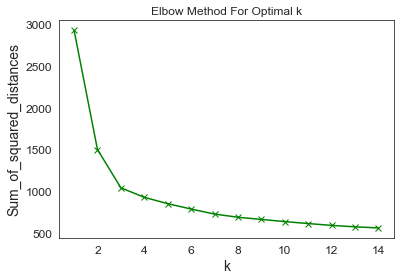

In [12]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

With this method I got the right number of cluster. 

> When k = 3 "the average squared distance to cluster centre starts to trail off significantly. This is the long awaited elbow, the optimal k" - [Sylvester Cardorelle](https://github.com/SylCard/Spotify-Emotions-Project)
## K = 3

## Visualising the Clusters using PCA & t-SNE

> "We’re dealing with high dimensional data, which means it’s pretty hard to imagine. Thankfully, we can use dimensionality reduction techniques to reduce the dimensions of our data, making it easier to visualise whilst retaining most of the information held within the data (e.g. variance). I used two dimensionality reduction algorithms, Principal component analysis (PCA) and t-Distributed Stochastic Neighbour Embedding (t-SNE) to visualise the clusters" [Sylvester Cardorelle](https://github.com/SylCard/Spotify-Emotions-Project)

In [13]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(songs_features)

KMeans(n_clusters=3)

In [14]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

C:\Users\drive\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


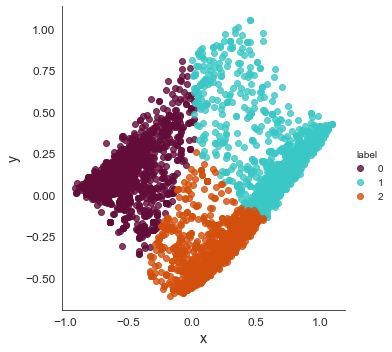

In [15]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [16]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

C:\Users\drive\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\drive\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\drive\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


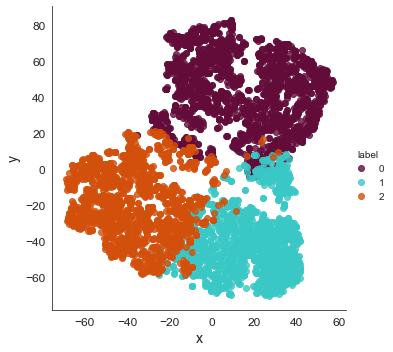

In [17]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

# Exploring each of the 5 clusters and exporting them into csv files

Number of songs per cluster:

In [18]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

0    2425
2    1871
1    1668
Name: label, dtype: int64

# Cluster # 0

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'label'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

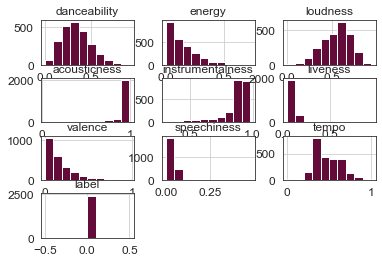

In [19]:
# visualizing the features
songs[songs['label']==0].hist()

In [20]:
# checking the cluster data
songs[songs['label'] == 0].head(10)

,id,embed_link,title,uri,all_artists,artists_id,artists_uri,genres,release_date,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,speechiness,tempo,label
3851,2YKFxTJ1pxCZlgH2HoewlS,https://embed.spotify.com?uri=spotify%3Atrack%...,"A Memorable Fancy (From ""Genshin Impact"") - Pi...",spotify:track:2YKFxTJ1pxCZlgH2HoewlS,Moisés Nieto,6i5jeqNyrzyfDwIiAfNdyF,spotify:artist:6i5jeqNyrzyfDwIiAfNdyF,piano music,20/04/2022,0.644,0.06230,0.642462,0.995,0.943,0.1040,0.2680,0.0846,0.305148,0
161,5I2rnqzPEwhZyuiELA0hB1,https://embed.spotify.com?uri=spotify%3Atrack%...,Jo Writes,spotify:track:5I2rnqzPEwhZyuiELA0hB1,Alexandre Desplat,71jzN72g8qWMCMkWC5p1Z0,spotify:artist:71jzN72g8qWMCMkWC5p1Z0,film score,13/12/2019,0.386,0.15800,0.660381,0.979,0.919,0.0972,0.0449,0.0331,0.412813,0
5629,4TsoSa0dGWZop7X7CUcGRP,https://embed.spotify.com?uri=spotify%3Atrack%...,LoFi Dream a Little Dream of Me,spotify:track:4TsoSa0dGWZop7X7CUcGRP,Ukulele Lofi,3ZULiixUrasy4n18rrUXJG,spotify:artist:3ZULiixUrasy4n18rrUXJG,lofi,07/09/2020,0.583,0.15900,0.644611,0.758,0.836,0.1140,0.2970,0.0341,0.381980,0
3385,2zM7Ato6xDOi8ten4qn7Cm,https://embed.spotify.com?uri=spotify%3Atrack%...,Natural Light,spotify:track:2zM7Ato6xDOi8ten4qn7Cm,Ludovico Einaudi,2uFUBdaVGtyMqckSeCl0Qj,spotify:artist:2uFUBdaVGtyMqckSeCl0Qj,contemporary classical music,29/10/2021,0.218,0.00352,0.131788,0.992,0.951,0.1390,0.1920,0.0515,0.317537,0
4497,5gOJt3593m0isTfGjkrDJV,https://embed.spotify.com?uri=spotify%3Atrack%...,One Last Dream,spotify:track:5gOJt3593m0isTfGjkrDJV,Radical Face,5EM6xJN2QNk0cL7EEm9HR9,spotify:artist:5EM6xJN2QNk0cL7EEm9HR9,instrumental,24/06/2021,0.216,0.20600,0.645822,0.911,0.919,0.1100,0.0398,0.0384,0.311984,0
4613,3qBjnDMDQrSKXKkBHok6oo,https://embed.spotify.com?uri=spotify%3Atrack%...,Afterhours,spotify:track:3qBjnDMDQrSKXKkBHok6oo,Robert Elovsson,1qbdguQmvfReqeUnLezmAx,spotify:artist:1qbdguQmvfReqeUnLezmAx,background jazz,07/08/2020,0.299,0.03260,0.310454,0.993,0.891,0.1110,0.0938,0.0388,0.376852,0
2695,3gFQOMoUwlR6aUZj81gCzu,https://embed.spotify.com?uri=spotify%3Atrack%...,One Summer Day,spotify:track:3gFQOMoUwlR6aUZj81gCzu,Joe Hisaishi,7nzSoJISlVJsn7O0yTeMOB,spotify:artist:7nzSoJISlVJsn7O0yTeMOB,japanese soundtrack,18/07/2001,0.410,0.19600,0.672815,0.953,0.892,0.0974,0.0622,0.0383,0.364805,0
441,25b7fqfmk1yDyWcmoiiAkd,https://embed.spotify.com?uri=spotify%3Atrack%...,High Above,spotify:track:25b7fqfmk1yDyWcmoiiAkd,Austin Farwell,3gfeKrOBLlmoaUXfGJzmS5,spotify:artist:3gfeKrOBLlmoaUXfGJzmS5,new-age,09/09/2020,0.277,0.09700,0.497760,0.947,0.935,0.1060,0.1330,0.0365,0.274579,0
70,4tHvqQjxvhxUwRL852SyAl,https://embed.spotify.com?uri=spotify%3Atrack%...,"Sonata No. 23 in F Minor, Op. 57, ""Appassionat...",spotify:track:4tHvqQjxvhxUwRL852SyAl,Adolph Drescher,3LnbPfJbrUfizz3LHVxsBW,spotify:artist:3LnbPfJbrUfizz3LHVxsBW,classical music,26/04/2011,0.334,0.22200,0.625891,0.993,0.920,0.1060,0.0399,0.0423,0.487520,0
5683,7u8RqJG9PR6mYNumJQfYy7,https://embed.spotify.com?uri=spotify%3Atrack%...,Don't Believe,spotify:track:7u8RqJG9PR6mYNumJQfYy7,Vashti Bunyan,4chuPfKtATDZvbRLExsTp2,spotify:artist:4chuPfKtATDZvbRLExsTp2,folk,25/01/2004,0.656,0.15600,0.614440,0.995,0.615,0.1080,0.6720,0.0841,0.527794,0


In [21]:
# exporting the cluster into a csv file
songs[songs['label'] == 0].to_csv("Cluster_0.csv", index = False)

# Cluster # 1

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'label'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

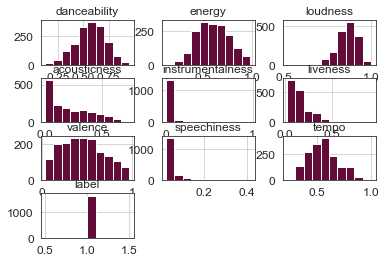

In [22]:
# visualizing the features
songs[songs['label']==1].hist()

In [23]:
# checking the cluster data
songs[songs['label'] == 1].head(10)

,id,embed_link,title,uri,all_artists,artists_id,artists_uri,genres,release_date,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,speechiness,tempo,label
5470,2PLi7OmleXPNBrGLon3sUy,https://embed.spotify.com?uri=spotify%3Atrack%...,Sweet Disposition,spotify:track:2PLi7OmleXPNBrGLon3sUy,The Temper Trap,4W48hZAnAHVOC2c8WH8pcq,spotify:artist:4W48hZAnAHVOC2c8WH8pcq,indie rock,10/08/2009,0.542,0.813,0.880028,0.07650,0.252000,0.1160,0.3050,0.0429,0.597448,1
803,0lkQOB949M2gLyut86aJ1b,https://embed.spotify.com?uri=spotify%3Atrack%...,Cigarette Daydreams,spotify:track:0lkQOB949M2gLyut86aJ1b,Cage The Elephant,26T3LtbuGT1Fu9m0eRq5X3,spotify:artist:26T3LtbuGT1Fu9m0eRq5X3,indie rock,08/10/2013,0.636,0.676,0.958836,0.08070,0.000000,0.0831,0.2730,0.0263,0.527517,1
662,1BwhFXqoIsePt21WyWIttb,https://embed.spotify.com?uri=spotify%3Atrack%...,I Wanna Get Better,spotify:track:1BwhFXqoIsePt21WyWIttb,Bleachers,2eam0iDomRHGBypaDQLwWI,spotify:artist:2eam0iDomRHGBypaDQLwWI,indie,14/07/2014,0.446,0.915,0.895319,0.00281,0.000039,0.2180,0.3980,0.1410,0.879409,1
4019,16iRlyUMJVPqz62DlomMre,https://embed.spotify.com?uri=spotify%3Atrack%...,Ikaw Lang,spotify:track:16iRlyUMJVPqz62DlomMre,NOBITA,5GVk1KCKa1tdHRev4bMw7V,spotify:artist:5GVk1KCKa1tdHRev4bMw7V,opm,12/06/2020,0.513,0.380,0.784010,0.12000,0.000000,0.0924,0.3230,0.0336,0.559784,1
2839,0oiCeOPwm4zhwfyIpAE37y,https://embed.spotify.com?uri=spotify%3Atrack%...,Love on the Weekend,spotify:track:0oiCeOPwm4zhwfyIpAE37y,John Mayer,0hEurMDQu99nJRq8pTxO14,spotify:artist:0hEurMDQu99nJRq8pTxO14,acoustic,14/04/2017,0.718,0.583,0.857309,0.62300,0.000681,0.0612,0.4220,0.0288,0.555244,1
5588,52AWuNH7rgcyRdEM0lQzPz,https://embed.spotify.com?uri=spotify%3Atrack%...,Long Shot - Mount Pleasant Remix,spotify:track:52AWuNH7rgcyRdEM0lQzPz,"Transviolet, Mount Pleasant",1kzPmFEEz0wTgXoCzJTwBz,spotify:artist:1kzPmFEEz0wTgXoCzJTwBz,electronica,03/01/2020,0.692,0.756,0.870543,0.48500,0.113000,0.1590,0.2330,0.0424,0.541415,1
892,6PrTCr4WB1Pyf7Fk1Hd1Da,https://embed.spotify.com?uri=spotify%3Atrack%...,Melatonin,spotify:track:6PrTCr4WB1Pyf7Fk1Hd1Da,Carter Vail,4Bu9DnBZ12oX7MiiaJy9hK,spotify:artist:4Bu9DnBZ12oX7MiiaJy9hK,dream pop,18/05/2018,0.701,0.565,0.784101,0.10800,0.000125,0.0952,0.6020,0.0312,0.509305,1
3948,21szgNA72iLwvBxHQLgwBh,https://embed.spotify.com?uri=spotify%3Atrack%...,die first,spotify:track:21szgNA72iLwvBxHQLgwBh,Nessa Barrett,7pwufEBGfggjoI8twqlsmQ,spotify:artist:7pwufEBGfggjoI8twqlsmQ,indie pop,24/06/2022,0.444,0.669,0.883754,0.06690,0.000000,0.1240,0.4400,0.1250,0.848993,1
3513,5G2Q4Vx9zwBAdQoEWgM8uX,https://embed.spotify.com?uri=spotify%3Atrack%...,Mirror,spotify:track:5G2Q4Vx9zwBAdQoEWgM8uX,Madison Ryann Ward,6eAUAR4N9NOpirukqdIzVI,spotify:artist:6eAUAR4N9NOpirukqdIzVI,soul,06/04/2018,0.646,0.420,0.895570,0.43000,0.000000,0.1070,0.0925,0.0840,0.599197,1
4537,46Q2YUUr8rfjI41OVSOPUM,https://embed.spotify.com?uri=spotify%3Atrack%...,Young Love,spotify:track:46Q2YUUr8rfjI41OVSOPUM,RELIC,2i1soaUZ6BZhbrxOpKy6we,spotify:artist:2i1soaUZ6BZhbrxOpKy6we,indie rock,24/04/2020,0.484,0.788,0.869149,0.08510,0.002480,0.2110,0.6980,0.0459,0.796014,1


In [24]:
# exporting the cluster into a csv file
songs[songs['label'] == 1].to_csv("Cluster_1.csv", index = False)

# Cluster # 2

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'label'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

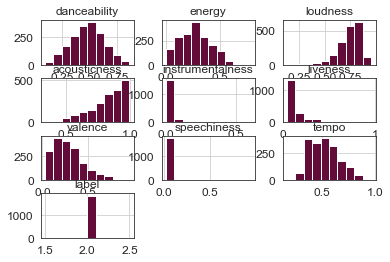

In [25]:
# visualizing the features
songs[songs['label']==2].hist()

In [26]:
# checking the cluster data
songs[songs['label']==2].head(10)

,id,embed_link,title,uri,all_artists,artists_id,artists_uri,genres,release_date,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,speechiness,tempo,label
3451,3wefloF3t1sFZx8YMFhqYB,https://embed.spotify.com?uri=spotify%3Atrack%...,Shouldn't Be,spotify:track:3wefloF3t1sFZx8YMFhqYB,Luke Chiang,1dPSMH55yhvjYIwqCP4iDj,spotify:artist:1dPSMH55yhvjYIwqCP4iDj,R&B,01/05/2019,0.651,0.291,0.808740,0.738,0.000000,0.115,0.3020,0.0326,0.578047,2
883,7125Z776uNesKF0pNYU3lU,https://embed.spotify.com?uri=spotify%3Atrack%...,"Symphony No. 1 in D major, Wq. 183/1: Symphony...",spotify:track:7125Z776uNesKF0pNYU3lU,"Carl Philipp Emanuel Bach, Andrew Manze",0MPbAeGQj0YatrUMdY2KEr,spotify:artist:0MPbAeGQj0YatrUMdY2KEr,classical music,14/11/2006,0.292,0.164,0.630851,0.912,0.029600,0.177,0.2840,0.0342,0.691723,2
953,5HKv1sFHbXgmXBih203HxT,https://embed.spotify.com?uri=spotify%3Atrack%...,I Don't Wanna Be Okay Without You,spotify:track:5HKv1sFHbXgmXBih203HxT,Charlie Burg,0ubGY2CcC0tvR0eE6hJaT8,spotify:artist:0ubGY2CcC0tvR0eE6hJaT8,indie rock,20/12/2016,0.532,0.319,0.866978,0.399,0.000025,0.138,0.1660,0.0288,0.291499,2
3748,2mH66pzZ6Vhc4QTpAIdew8,https://embed.spotify.com?uri=spotify%3Atrack%...,A New Uni-deform,spotify:track:2mH66pzZ6Vhc4QTpAIdew8,Michael Giacchino,4kLvhMAuCloLxoP1aVM7Lr,spotify:artist:4kLvhMAuCloLxoP1aVM7Lr,film score,18/10/2019,0.572,0.017,0.474584,0.808,0.368000,0.198,0.1970,0.0476,0.509416,2
3104,6IfPyMb0Sxptpx6jBUATOS,https://embed.spotify.com?uri=spotify%3Atrack%...,Old Money,spotify:track:6IfPyMb0Sxptpx6jBUATOS,Lana Del Rey,00FQb4jTyendYWaN8pK0wa,spotify:artist:00FQb4jTyendYWaN8pK0wa,indie pop,01/01/2014,0.312,0.168,0.752354,0.888,0.000007,0.147,0.1540,0.0332,0.500373,2
3173,6cIKtihxWYkzkJHPQOiun1,https://embed.spotify.com?uri=spotify%3Atrack%...,Sardine Song,spotify:track:6cIKtihxWYkzkJHPQOiun1,Lav,4yql3diaCYkv88Xrh7rwVl,spotify:artist:4yql3diaCYkv88Xrh7rwVl,indie folk,09/06/2021,0.364,0.211,0.718047,0.931,0.216000,0.320,0.2100,0.0405,0.679116,2
2110,4ys4z4bBUtTmzfjWtYnoli,https://embed.spotify.com?uri=spotify%3Atrack%...,midnight love,spotify:track:4ys4z4bBUtTmzfjWtYnoli,girl in red,3uwAm6vQy7kWPS2bciKWx9,spotify:artist:3uwAm6vQy7kWPS2bciKWx9,indie pop,30/04/2021,0.284,0.538,0.811369,0.717,0.105000,0.111,0.2590,0.0886,0.831716,2
304,54DTLQMjyF60TY8b4jkKRa,https://embed.spotify.com?uri=spotify%3Atrack%...,One Note Samba (Samba de Uma Nota So),spotify:track:54DTLQMjyF60TY8b4jkKRa,Antônio Carlos Jobim,1Mxqyy3pSjf8kZZL4QVxS0,spotify:artist:1Mxqyy3pSjf8kZZL4QVxS0,bossa nova,1967-03,0.601,0.418,0.796558,0.801,0.000044,0.117,0.7010,0.0622,0.644253,2
280,0q4XPi4qT3dFf4sO5QflQm,https://embed.spotify.com?uri=spotify%3Atrack%...,"Songs My Mother Taught Me (from ""Gypsy Songs"",...",spotify:track:0q4XPi4qT3dFf4sO5QflQm,Antonín Dvořák,7JmDqds7Y1LRSWZVM8e0Og,spotify:artist:7JmDqds7Y1LRSWZVM8e0Og,classical music,18/09/2015,0.286,0.045,0.413078,0.978,0.263000,0.112,0.0733,0.0431,0.415117,2
3476,2W779g2UrRZtVdf3FcEOO1,https://embed.spotify.com?uri=spotify%3Atrack%...,In My Mind,spotify:track:2W779g2UrRZtVdf3FcEOO1,Lyn Lapid,4pfy05cNNTacuOQ6SiSu4v,spotify:artist:4pfy05cNNTacuOQ6SiSu4v,gen z singer-songwriter,20/08/2021,0.668,0.392,0.759165,0.789,0.002750,0.345,0.3230,0.0585,0.629132,2


In [27]:
# exporting the cluster into a csv file
songs[songs['label'] == 2].to_csv("Cluster_2.csv", index = False)